In [1]:
#Download tgz data file and extract to directory

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [2]:
# load data using Pandas

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


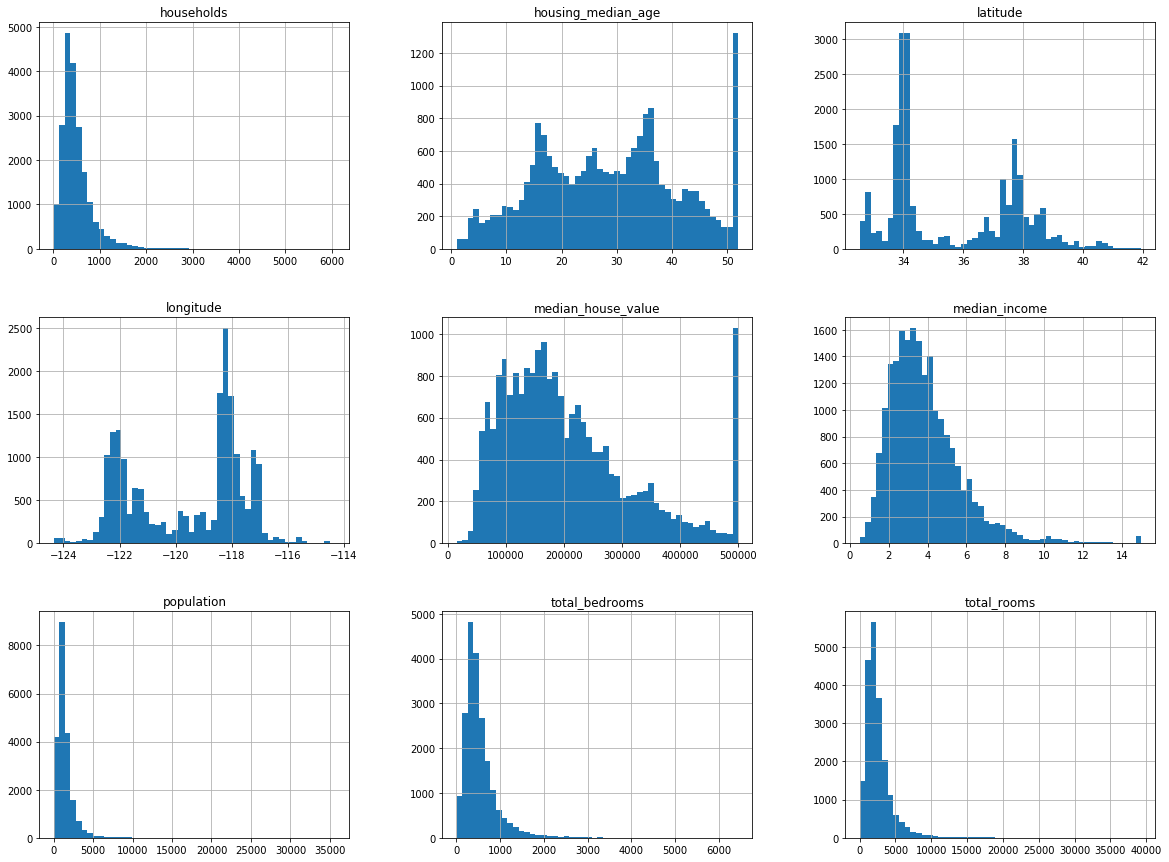

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# set aside a test set

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
#This function not used because it randomizes choosing test data
#train_set, test_set = split_train_test(housing, 0.2)
#print(len(train_set), "train + ", len(test_set), "test")


In [8]:
#Setup for Stratified sampling
#Based on median income. We want a test set to represent 
#a good diversity of incomes

#make new income category attiribute dividning median income by 1.5
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [11]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
#now that we have our test and training sets we remove the income_cat attribute

for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)


In [13]:
#making copy of training set we can play with
housing = strat_train_set.copy()

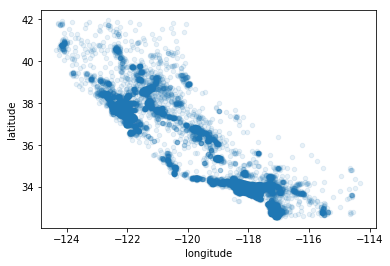

In [14]:
#Plotting lat and long

housing.plot(kind="scatter", x="longitude",y="latitude", alpha=0.1)

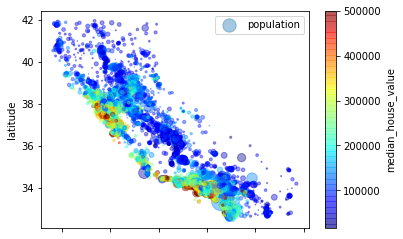

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

In [16]:
#COmputing standard correlation coefficient Pearson's r between
#every pair of attributes

corr_matrix = housing.corr()

#seeing how each attribute correlates with median house value

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688435
total_rooms           0.134157
housing_median_age    0.113284
households            0.064943
total_bedrooms        0.048268
population           -0.025376
longitude            -0.047355
latitude             -0.143235
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a246e8908>,
      dtype=object)

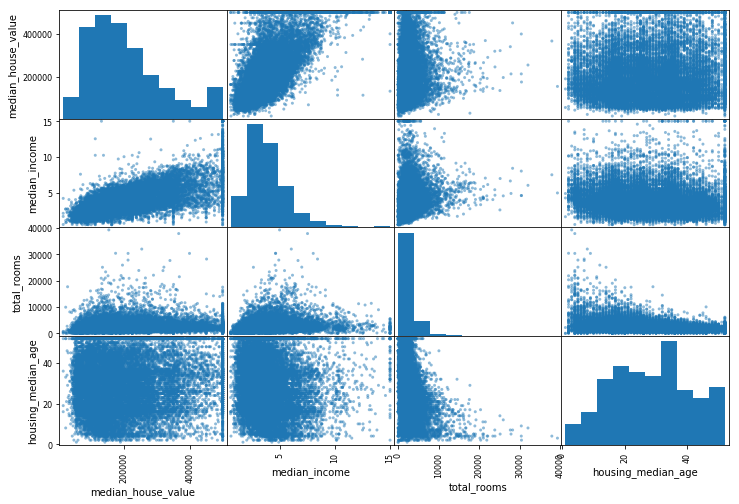

In [17]:
#making scatter matrix to see correlation betterer

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

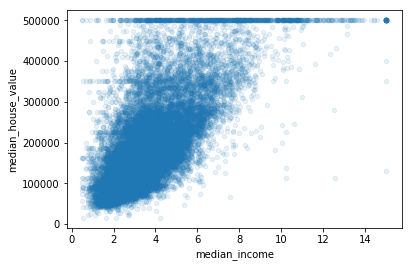

In [18]:
#most promising is median income

housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)


In [19]:
# adding new attributes

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]


In [20]:
corr_matrix = housing.corr()

#seeing how each attribute correlates with median house value

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688435
rooms_per_household         0.150216
total_rooms                 0.134157
housing_median_age          0.113284
households                  0.064943
total_bedrooms              0.048268
population_per_household   -0.022975
population                 -0.025376
longitude                  -0.047355
latitude                   -0.143235
bedrooms_per_room          -0.259775
Name: median_house_value, dtype: float64

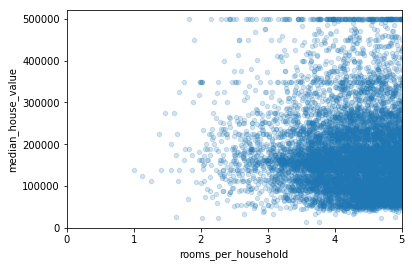

In [21]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
            alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [22]:
#revert to clean training set

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [23]:
#Fix the missing data in total bedrooms

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
#can't compute median for non numerical data
#drop ocean proximity
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
imputer.statistics_


array([-118.5   ,   34.26  ,   29.    , 2124.    ,  433.    , 1164.    ,
        408.5   ,    3.5332])

In [24]:
#use this imputer to transform th training set by replacing missing values with the learned medians

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)


In [25]:
#dealing with the ocean proximity attribute
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded


array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [3.]])

In [26]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot[:10]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [27]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [28]:
# custom transformer. Basically, a class that can get scikit to change hyperparemeters for you to test them
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5 ,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

In [29]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household","bedrooms_per_room"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-118.26,34.06,33,1950,1047,3707,1012,1.7238,<1H OCEAN,1.92688,3.66304,0.536923
1,-120.72,38.38,9,1787,347,806,306,2.525,INLAND,5.83987,2.63399,0.19418
2,-118.37,34.08,52,2946,695,1258,650,3.9783,<1H OCEAN,4.53231,1.93538,0.235913
3,-118.31,34.02,46,2217,489,1227,448,1.6851,<1H OCEAN,4.94866,2.73884,0.220568
4,-120.23,39.56,14,1781,346,734,287,2.46,INLAND,6.20557,2.55749,0.194273


In [30]:
# pipeline to transform data all in one. COntains same steps as before but now in a pipeline

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import TransformerMixin #gives fit_transform method for free
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)
print(housing_labels.shape)


(18576, 16)
(18576,)


In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [159010.54114615  64299.63528047 284162.05957786 160705.81734887
  23079.22852971]


In [33]:
print("Labels:", list(some_labels))

Labels: [110000.0, 157200.0, 374100.0, 108800.0, 93000.0]


In [34]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68451.25887361675

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [36]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard Deviation", scores.std())

display_scores(rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10,verbose=True,max_features=5,n_jobs=-1)
forest_reg.fit(housing_prepared, housing_labels)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=True, warm_start=False)

In [125]:
ranfo_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
ranfo_rmse_scores = np.sqrt(-ranfo_scores)
display_scores(ranfo_rmse_scores)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Paral

Scores: [47475.33982832 45933.48655099 47549.06519632 50282.20320134
 47982.90440236 49085.53173704 49633.86381949 49165.87157847
 48757.65347269 49352.80813948]
Mean 48521.87279264828
Standard Deviation 1218.4250177823626


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
from sklearn import svm
svm_reg = svm.SVR(gamma='auto', verbose=True)
svm_reg.fit(housing_prepared, housing_labels)

In [ ]:
svr_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

In [ ]:
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", svm_reg.predict(some_data_prepared))

In [127]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'bootstrap':[False], 'n_estimators': [100,120,150,200], 'max_features': [5]},
]



In [128]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [129]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'bootstrap': [False], 'n_estimators': [100, 120, 150, 200], 'max_features': [5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [133]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 5, 'n_estimators': 200}

In [134]:
cvres = grid_search.cv_results_

In [135]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48003.26188629146 {'bootstrap': False, 'max_features': 5, 'n_estimators': 100}
47886.921987837566 {'bootstrap': False, 'max_features': 5, 'n_estimators': 120}
47917.624151460644 {'bootstrap': False, 'max_features': 5, 'n_estimators': 150}
47872.54443495375 {'bootstrap': False, 'max_features': 5, 'n_estimators': 200}


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=500),
    'max_features': randint(low=1, high=8),
}



In [41]:
forest_reg = RandomForestRegressor(random_state=42,verbose=3,n_jobs=-1,bootstrap=False)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                             n_iter=50, cv=5, scoring='neg_mean_squared_error',random_state=42,verbose=3,n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 11.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 386building tree 2 of 386building tree 3 of 386building tree 4 of 386building tree 5 of 386building tree 6 of 386building tree 7 of 386building tree 8 of 386







building tree 9 of 386
building tree 10 of 386
building tree 11 of 386
building tree 12 of 386
building tree 13 of 386
building tree 14 of 386
building tree 15 of 386
building tree 16 of 386
building tree 17 of 386
building tree 18 of 386
building tree 19 of 386
building tree 20 of 386
building tree 21 of 386
building tree 22 of 386
building tree 23 of 386
building tree 24 of 386
building tree 25 of 386
building tree 26 of 386
building tree 27 of 386
building tree 28 of 386
building tree 29 of 386
building tree 30 of 386
building tree 31 of 386
building tree 32 of 386


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s


building tree 33 of 386
building tree 34 of 386
building tree 35 of 386
building tree 36 of 386
building tree 37 of 386
building tree 38 of 386
building tree 39 of 386
building tree 40 of 386
building tree 41 of 386
building tree 42 of 386
building tree 43 of 386
building tree 44 of 386
building tree 45 of 386
building tree 46 of 386
building tree 47 of 386
building tree 48 of 386
building tree 49 of 386
building tree 50 of 386
building tree 51 of 386
building tree 52 of 386
building tree 53 of 386building tree 54 of 386

building tree 55 of 386
building tree 56 of 386
building tree 57 of 386
building tree 58 of 386
building tree 59 of 386
building tree 60 of 386
building tree 61 of 386
building tree 62 of 386
building tree 63 of 386
building tree 64 of 386
building tree 65 of 386
building tree 66 of 386
building tree 67 of 386
building tree 68 of 386
building tree 69 of 386building tree 70 of 386

building tree 71 of 386
building tree 72 of 386
building tree 73 of 386
building tree 74

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    2.4s


building tree 129 of 386
building tree 130 of 386
building tree 131 of 386
building tree 132 of 386
building tree 133 of 386
building tree 134 of 386
building tree 135 of 386
building tree 136 of 386
building tree 137 of 386
building tree 138 of 386
building tree 139 of 386
building tree 140 of 386
building tree 141 of 386
building tree 142 of 386
building tree 143 of 386
building tree 144 of 386
building tree 145 of 386
building tree 146 of 386
building tree 147 of 386
building tree 148 of 386
building tree 149 of 386
building tree 150 of 386
building tree 151 of 386
building tree 152 of 386
building tree 153 of 386
building tree 154 of 386
building tree 155 of 386
building tree 156 of 386
building tree 157 of 386
building tree 158 of 386
building tree 159 of 386
building tree 160 of 386
building tree 161 of 386
building tree 162 of 386
building tree 163 of 386
building tree 164 of 386
building tree 165 of 386
building tree 166 of 386
building tree 167 of 386
building tree 168 of 386


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    5.9s


building tree 285 of 386
building tree 286 of 386building tree 287 of 386

building tree 288 of 386
building tree 289 of 386
building tree 290 of 386
building tree 291 of 386
building tree 292 of 386
building tree 293 of 386
building tree 294 of 386
building tree 295 of 386
building tree 296 of 386
building tree 297 of 386
building tree 298 of 386
building tree 299 of 386
building tree 300 of 386
building tree 301 of 386
building tree 302 of 386building tree 303 of 386
building tree 304 of 386

building tree 305 of 386
building tree 306 of 386
building tree 307 of 386
building tree 308 of 386
building tree 309 of 386
building tree 310 of 386
building tree 311 of 386
building tree 312 of 386
building tree 313 of 386
building tree 314 of 386
building tree 315 of 386
building tree 316 of 386
building tree 317 of 386
building tree 318 of 386
building tree 319 of 386
building tree 320 of 386
building tree 321 of 386
building tree 322 of 386
building tree 323 of 386
building tree 324 of 386


[Parallel(n_jobs=-1)]: Done 386 out of 386 | elapsed:    8.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=42, verbose=3, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x120f6e438>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x120f6e5c0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=3)

In [42]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48000.78203387791 {'max_features': 7, 'n_estimators': 436}
48035.922651101275 {'max_features': 5, 'n_estimators': 271}
49126.48079981191 {'max_features': 3, 'n_estimators': 72}
49607.8067371283 {'max_features': 5, 'n_estimators': 21}
48160.52271336235 {'max_features': 7, 'n_estimators': 122}
48795.247706288385 {'max_features': 3, 'n_estimators': 215}
48647.01710791628 {'max_features': 3, 'n_estimators': 459}
48300.87317910922 {'max_features': 5, 'n_estimators': 100}
48909.444079168235 {'max_features': 3, 'n_estimators': 150}
48041.81190006491 {'max_features': 5, 'n_estimators': 258}
48127.29387327603 {'max_features': 4, 'n_estimators': 414}
47769.22358460443 {'max_features': 6, 'n_estimators': 386}
48188.47971956351 {'max_features': 4, 'n_estimators': 277}
52436.27093274991 {'max_features': 1, 'n_estimators': 460}
51984.304264263745 {'max_features': 2, 'n_estimators': 22}
48038.16119349884 {'max_features': 5, 'n_estimators': 236}
53034.16163596912 {'max_features': 1, 'n_estimators': 49

In [46]:
rnd_search.best_params_

{'max_features': 6, 'n_estimators': 386}